In [ ]:
"""
Complete Salary Data Project with Advanced Visualizations,
Multiple Regression Models, Feature Engineering, and an Interactive Dashboard.
"""

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [6]:
# Interactive visualization libraries
import plotly.express as px


In [7]:
# For interactive dashboard (Streamlit)
import streamlit as st

In [8]:
# -------------------------
# 1. Data Loading and Basic EDA
# -------------------------
# Load the dataset (update the path if necessary)
df = pd.read_csv("/content/Salary Data.csv")
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
    Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
3               1.5   37731
4               2.0   43525


In [9]:
# Check column names – we assume the file has "YearsExperience" and "Salary"
print("Columns in DataFrame:", df.columns)


Columns in DataFrame: Index(['Experience Years', 'Salary'], dtype='object')


In [10]:
# Display basic information and descriptive statistics
print("\nDataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes
None

Descriptive Statistics:
       Experience Years         Salary
count         40.000000      40.000000
mean           5.152500   74743.625000
std            2.663715   25947.122885
min            1.100000   37731.000000
25%            3.200000   56878.250000
50%            4.600000   64472.500000
75%            6.875000   95023.250000
max           10.500000  122391.000000


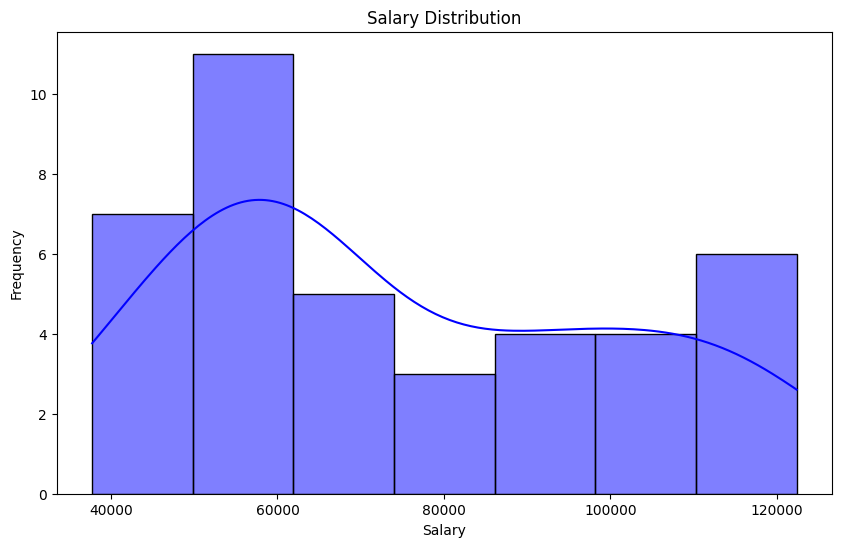

In [11]:

# Visualize the distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

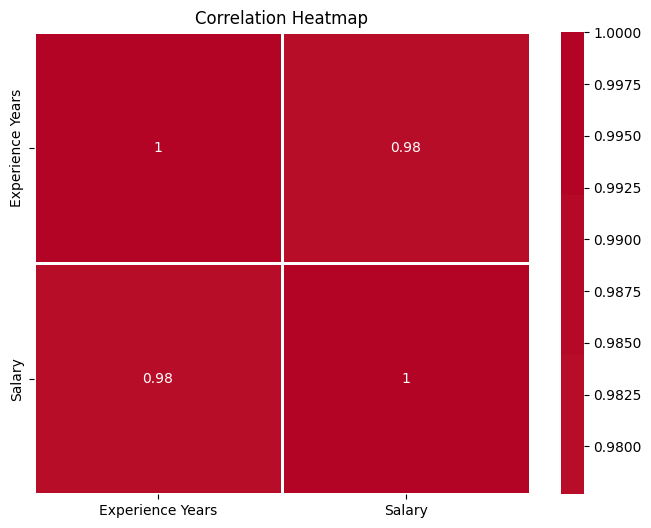

In [12]:
# Display a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

In [14]:

# -------------------------
# 2. Feature Engineering
# -------------------------
# Create a new feature: squared term for YearsExperience to capture non-linearity
df['Experience_squared'] = df['Experience Years'] ** 2
print("\nDataFrame after adding 'Experience_squared':\n", df.head())


DataFrame after adding 'Experience_squared':
    Experience Years  Salary  Experience_squared
0               1.1   39343                1.21
1               1.2   42774                1.44
2               1.3   46205                1.69
3               1.5   37731                2.25
4               2.0   43525                4.00


In [15]:
# Define features (X) and target (y)
X = df[['Experience Years', 'Experience_squared']]
y = df['Salary']


In [16]:
# -------------------------
# 3. Train/Test Split and Feature Scaling
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# -------------------------
# Linear Regression Model
# -------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Linear Regression Model ---")
print(f"Coefficient(s): {lr.coef_}")
print(f"Intercept: {lr.intercept_}")
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Absolute Error: {lr_mae}")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")



--- Linear Regression Model ---
Coefficient(s): [23569.37222709  2250.5868455 ]
Intercept: 75549.8125
Mean Absolute Error: 6492.959869078871
Mean Squared Error: 48711856.571857296
R-squared: 0.9056292496819227


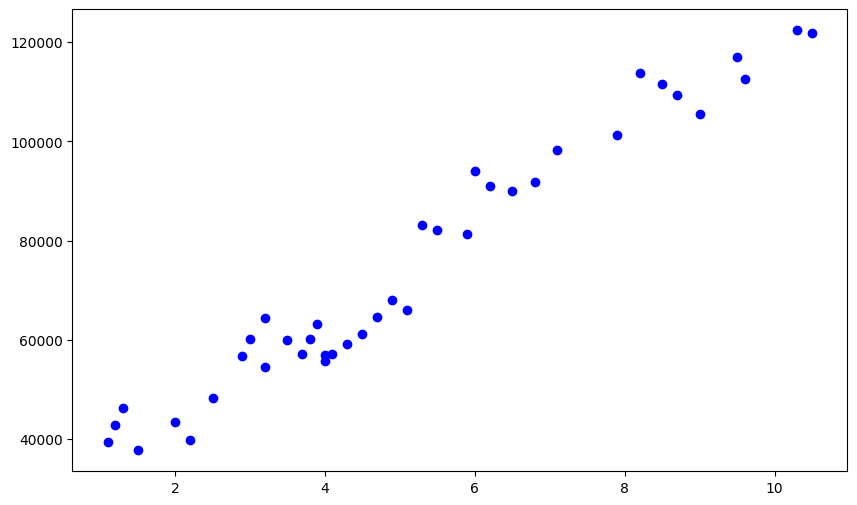

In [20]:
# Plot the regression line (on the original data)
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience Years'], df['Salary'], color='blue', label='Data Points')

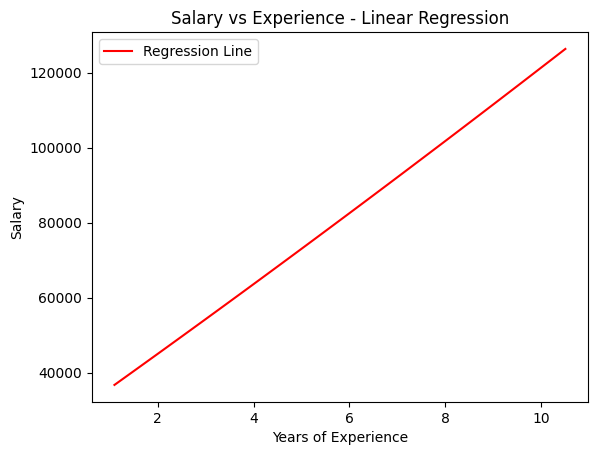

In [22]:
# To visualize the regression line, fit a model on unscaled data
lr_orig = LinearRegression()
lr_orig.fit(X, y)
plt.plot(df['Experience Years'], lr_orig.predict(X), color='red', label='Regression Line')
plt.title("Salary vs Experience - Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [24]:
# -------------------------
# Polynomial Regression (Degree 2)
# -------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Experience Years']])
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)

LinearRegression()

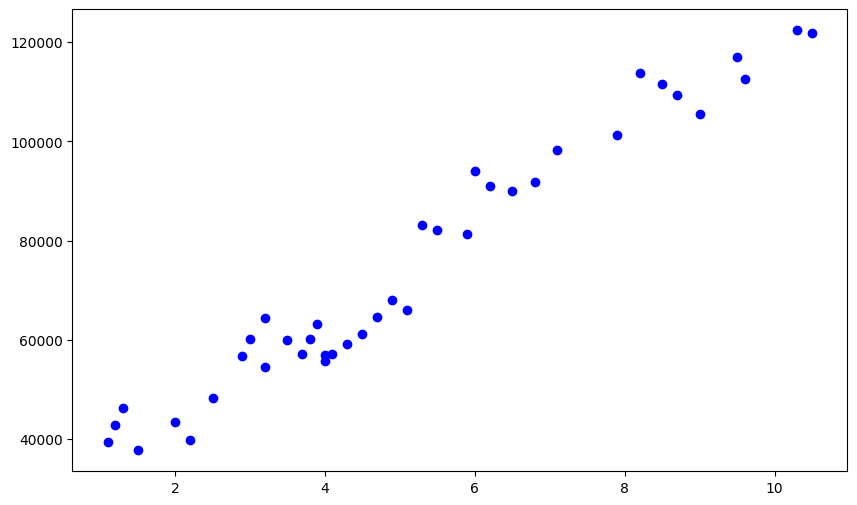

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience Years'], y, color='blue', label='Data Points')

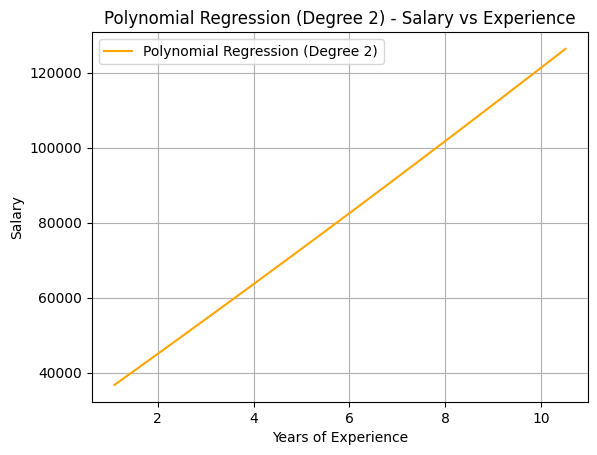


R-squared formula: R² = 1 - (SS_res / SS_tot)
Where SS_res = sum of squared residuals and SS_tot = total sum of squares.


In [27]:
# For a smooth polynomial curve, sort the values
sorted_exp = np.sort(df['Experience Years'].values)
plt.plot(sorted_exp,
         poly_lr.predict(poly.fit_transform(sorted_exp.reshape(-1, 1))),
         color='orange', label='Polynomial Regression (Degree 2)')
plt.title("Polynomial Regression (Degree 2) - Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

print("\nR-squared formula: R² = 1 - (SS_res / SS_tot)")
print("Where SS_res = sum of squared residuals and SS_tot = total sum of squares.")


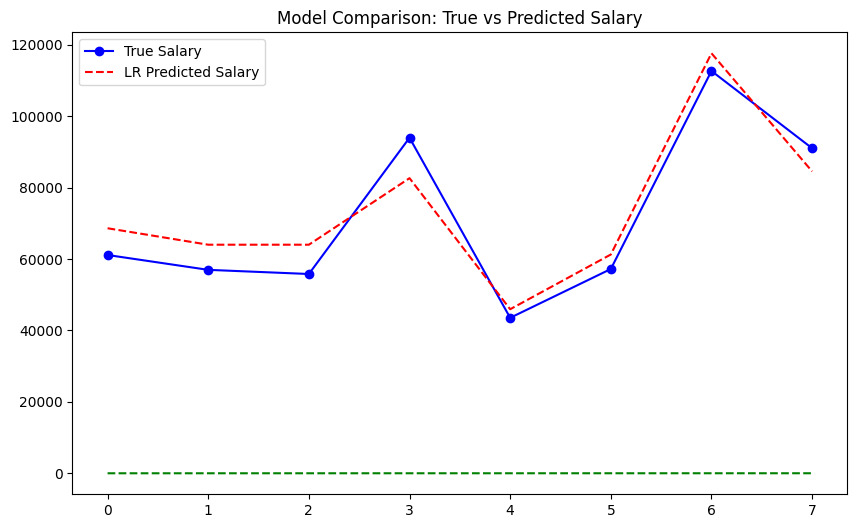

In [29]:
# -------------------------
# Model Comparison Visualization
# -------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='True Salary', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred_lr, label='LR Predicted Salary', color='red', linestyle='--')
plt.plot(range(len(y_test)), color='green', linestyle='--')
plt.title("Model Comparison: True vs Predicted Salary")
plt.legend()
plt.show()


In [30]:

# -------------------------
# Interactive Plot with Plotly
# -------------------------
fig = px.scatter(df, x='Experience Years', y='Salary',
                 title="Salary vs Experience",
                 labels={"Experience Years": "Years of Experience", "Salary": "Salary"})
fig.update_traces(marker=dict(color='red', size=12, opacity=0.8))
fig.show()

In [31]:
# -------------------------
# Dynamic Salary Prediction with Streamlit
# -------------------------
def run_streamlit_app():
    st.title('Salary Prediction Model')
    st.write("This model predicts the salary based on years of experience.")
    years_of_experience = st.slider('Select Years of Experience', 0, 40, 5)
    # Create input feature vector (including the squared term)
    input_features = np.array([[years_of_experience, years_of_experience ** 2]])
    input_features_scaled = scaler.transform(input_features)
    salary_pred_lr = lr.predict(input_features_scaled)[0]
    salary_pred_lasso = best_lasso.predict(input_features_scaled)[0]
    st.write(f"Predicted Salary using Linear Regression: ${salary_pred_lr:,.2f}")
    st.write(f"Predicted Salary using Lasso Regression: ${salary_pred_lasso:,.2f}")

In [ ]:
# To run the Streamlit dashboard:
# 1. Save this script as, for example, "salary_prediction_app.py"
# 2. Open a terminal and run: streamlit run salary_prediction_app.py
# If running interactively in a notebook, you may comment out the below lines.
# if __name__ == '__main__':
#     run_streamlit_app()